# Деревья решений

## Построение дерева

Опишем жадный алгоритм построения бинарного дерева решений:
1. Начинаем со всей обучающей выборки $X$, которую помещаем в корень $R_1$. 
2. Задаём функционал качества $Q(X, j, t)$ и критерий остановки. 
3. Запускаем построение из корня: $SplitNode(1, R_1)$

Функция $SplitNode(m, R_m)$
1. Если выполнен критерий остановки, то выход.
2. Находим наилучший с точки зрения $Q$ предикат: $j, t$: $[x_j<t]$
3. Помещаем предикат в вкршину и получаем с его помощью разбиение $X$ на две части: $R_{left} = \lbrace x|x_j<t \rbrace$ и $R_{right} = \lbrace x|x_j \geqslant t \rbrace$
4. Поместим $R_{left}$ и $R_{right}$ соответсвенно в левое и правое поддерево.
5. Рекурсивно повторяем $SplitNode(left, R_{left})$ и $SplitNode(right, R_{right})$.

В конце поставим в соответствие каждому листу ответ. Для задачи классификации - это самый частый среди объектов класс или вектор с долями классов (можно интерпретировать как вероятности):
$$ c_v = \arg \max_{k\in Y} \sum_{(x_i,y_i) \in R_v} [y_i=k]  $$

## Функционал качества для деревьев решений


Энтропия Шеннона для системы с N возможными состояниями определяется по формуле:
$$H = - \sum_{i=0}^{N} p_i\log_2p_i $$

где $p_i$ – вероятности нахождения системы в $i$-ом состоянии. 

Это очень важное понятие теории информации, которое позволяет оценить количество информации (степень хаоса в системе). Чем выше энтропия, тем менее упорядочена система и наоборот. С помощью энтропии мы формализуем функционал качества для разделение выборки (для задачи классификации).

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import random
from pprint import pprint

Код для расчёта энтропии:

In [ ]:
def entropy(y):
    
    _, counts = np.unique(y, return_counts=True)

    probabilities = counts / counts.sum()
    entropy = sum(probabilities * -np.log2(probabilities))
     
    return entropy

Здесь $y$ - это массив значений целевой переменной

Энтропия – по сути степень хаоса (или неопределенности) в системе. Уменьшение энтропии называют приростом информации (information gain, IG).

Обочначим $R_v$ - объекты, которые нужно разделить в помощью предиката в вершине $v$. Запишем формулу для расчёта информационного прироста:
$$ Q = IG = H(R_v) - (H(R_{left})+H(R_{right}))$$

На каждом шаге нам нужно максимизировать этот функционал качества. Как это делать? Например, так можно перебрать $t$ для выбранного $j$.

Предыдущая версия формулы прироста информации слишком упрощена. В работе необходимо использовать более устойчивую формулу, которая учитывает не только энтропию подмножеств, но и их размер. 

$$ Q = IG = H(R_v) - \Big (\frac{|R_{left}|} {|R_{v}|} H(R_{left})+ \frac{|R_{right}|} {|R_{v}|} H(R_{right})\Big)$$

где, $|R_{v}|$, $|R_{left}|$ и $|R_{right}|$ - количество элементов в соответствующих множествах.


### Задание 4.1

Реализуйте алгоритм построения дерева. Должны быть отдельные функции (методы) для расчёта энтропии (уже есть), для разделения дерева (используйте `pandas`), для подсчёта функционала качества $IG$, для выбора наилучшего разделения (с учетом признакоd и порогов), для проверки критерия остановки.

Для набора данных `iris` реализуйте алгоритм и минимум три из разными критерия остановки из перечисленных ниже:
* максимальной глубины дерева = 5
* минимального числа объектов в листе = 5
* максимальное количество листьев в дереве = 5
* purity (остановка, если все объекты в листе относятся к одному классу)

Реализуйте функцию `predict` (на вход функции подаётся датафрейм с объектами)

Оцените точность каждой модели с помощью метрики точность (`from sklearn.metrics import accuracy_score` или реализовать свою).

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
print(iris.data[:5])
print(iris.feature_names)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.33, random_state=42)

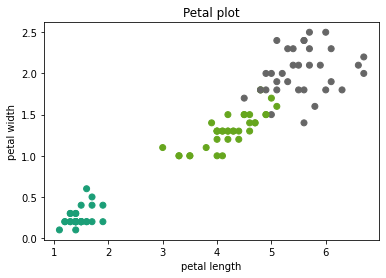

In [ ]:
plt.scatter(X_train[:,2],X_train[:,3],c=y_train, cmap=plt.cm.Dark2)
plt.title('Petal plot')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.show()

In [ ]:
df = pd.DataFrame(data= np.c_[X_train, y_train],
                 columns= iris['feature_names'] + ['target'])

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.7,2.9,4.2,1.3,1.0
1,7.6,3.0,6.6,2.1,2.0
2,5.6,3.0,4.5,1.5,1.0
3,5.1,3.5,1.4,0.2,0.0
4,7.7,2.8,6.7,2.0,2.0
...,...,...,...,...,...
95,6.1,2.8,4.0,1.3,1.0
96,4.9,2.5,4.5,1.7,2.0
97,5.8,4.0,1.2,0.2,0.0
98,5.8,2.6,4.0,1.2,1.0


In [ ]:
def ig(parent, y_left, y_right):
  return parent.get_entropy() - (len(y_left) / parent.get_samples() * entropy(y_left) + len(y_right) / parent.get_samples() * entropy(y_right))

In [ ]:
class Node:
  def __init__(self, X, y, depth, parent_node = None):
    self.parent_node = parent_node
    self.left_child = None
    self.right_child = None
    self.X = X
    self.y = y
    self.depth = depth
    self.column = None
    self.limit = None
  
  def get_entropy(self):
    return entropy(self.y)

  def get_samples(self):
    return len(self.y)

  def get_depth(self):
    return self.depth
  
  def is_leaf(self):
    return (self.left_child == None) and (self.right_child == None)

  def prediction(self):
    a, counts = np.unique(self.y, return_counts=True)
    max_counts = 0
    prediction_value = None
    for i in range(len(a)):
      if counts[i] > max_counts:
        prediction_value = a[i]
    return prediction_value


In [ ]:
class ImplementationOfDecisionTree:
  def __init__(self, max_depth, min_objects, max_leafs):
    self.max_depth = max_depth
    self.min_objects = min_objects
    self.max_leafs = max_leafs
    self.root = None
    self.start_depth = 0
    self.count_leaf = 1

  def fit(self, X_train, y_train):
    self.root = Node(X_train, y_train, self.start_depth)
    self.split(self.root)

  def split(self, current_node):
    if self.should_stop(current_node):
      return
    best_ig = 0
    best_split_left_y, best_split_right_y = [], []
    best_split_left_X, best_split_right_X = [], []
    split_left, split_right = [], []
    for column in range(len(current_node.X[0])):
      X_column = current_node.X[:, column]
      for value in X_column:
        split_left = current_node.y[X_column <= value]   
        split_right = current_node.y[X_column > value]
        if (len(split_left) < self.min_objects) or (len(split_right) < self.min_objects):
          continue
        current_ig = ig(current_node, split_left, split_right)
        if current_ig > best_ig:
          best_ig = current_ig
          best_split_left_y = split_left
          best_split_right_y = split_right
          best_split_left_X = current_node.X[X_column <= value]
          best_split_right_X = current_node.X[X_column > value]
          current_node.column = column
          current_node.limit = value
    if (best_ig == 0):
      return
    current_node.left_child = Node(best_split_left_X, best_split_left_y, current_node.get_depth() + 1, current_node)
    current_node.right_child = Node(best_split_right_X, best_split_right_y, current_node.get_depth() + 1, current_node)
    self.count_leaf += 1
    self.split(current_node.left_child)
    self.split(current_node.right_child)

  def should_stop(self, current_node):
    return (current_node.get_depth() == self.max_depth) or (self.count_leaf == self.max_leafs) or (current_node.get_entropy() == 0)

  def predict(self, X_test):
    current_node = self.root
    while not(current_node.is_leaf()):
      if X_test[current_node.column] <= current_node.limit:
        current_node = current_node.left_child
      else:
        current_node = current_node.right_child
    return current_node.prediction()


In [ ]:
tree = ImplementationOfDecisionTree(5, 5, 5)
tree.fit(X_train, y_train)

In [ ]:
test_prediction = np.array([tree.predict(X_test[i]) for i in range(len(X_test))])
test_prediction

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 2, 2, 1, 2])

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, test_prediction)

1.0

сравним с деревом из sklearn

In [ ]:
from sklearn.tree import DecisionTreeClassifier

sklearn_tree = DecisionTreeClassifier(criterion = "entropy", 
                                      max_depth = 5, 
                                      min_samples_leaf = 5, 
                                      max_leaf_nodes = 5)

sklearn_tree.fit(X_train, y_train)
sklearn_prediction = sklearn_tree.predict(X_test)
accuracy_score(y_test, sklearn_prediction)

1.0

##  Случайный лес

Опишем алгоритм случайный лес (*random forest*) и попутно разберём основные идеи:

1. Зададим $N$ - число деревьев в лесу.
2. Для каждого $n$ из $N$ сгенерируем свою выборку $X_n$. Пусть $m$ - это количество объектов в $X$. При генерации каждой $X_n$ мы будем брать объекты $m$ раз с возвращением. То есть один и тот же объект может попасть в выборку несколько раз, а какие-то объекты не попадут. (Этот способ назвается бутстрап).
3. По каждой $X_n$ построим решающее дерево $b_n$. Обычно стараются делать глубокие деревья. В качестве критериев остановки можно использовать `max_depth` или `min_samples_leaf` (например, пока в каждом листе не окажется по одному объекту). При каждом разбиении сначала выбирается $k$ (эвристика $k = \sqrt d$, где $d$ - это число признаков объектов из выборки $X$) случайных признаков из исходных, и оптимальное разделение выборки ищется только среди них. Обратите внимание, что мы не выбрасываем оставшиеся признаки!
4. Итоговый алгоритм будет представлять собой результат голосования (для классификации) и среднее арифметическое (для регрессии). Модификация алгоритма предполагает учёт весов каждого отдельного слабого алгоритма в ансамбле, но в этом особо нет смысла.


### Задание 4.2

В качестве набора данных используйте: https://www.kaggle.com/mathchi/churn-for-bank-customers

Там есть описание и примеры работы с этими данными. Если кратко, речь идёт про задачу прогнозирования оттока клиентов. Есть данные о 10 тысячах клиентов банка, часть из которых больше не являются клиентами.

Используя либо свою реализацию, либо  `DecisionTreeClassifier` с разными настройками из `sklearn.tree` реализйте алгоритм "случайный лес". 

Найдите наилучшие гиперпараметры этого алгоритма: количество деревьев, критерий остановки, функционал качества, минимальное количество объектов в листьях и другие.

Нельзя использовать готовую реализацию случайного леса из `sklearn`.

В подобных задачах очень важна интерпретируемость алгоритма. Попытайтесь оценить информативность признаков, т.е. ответить а вопрос, значения каких признаков являются самыми важными индикаторами того, что банк потеряет клиента.

In [ ]:
from google.colab import files
import io

uploaded = files.upload()

Saving churn.csv to churn.csv


In [ ]:
bank = pd.read_csv(io.BytesIO(uploaded['churn.csv']))
bank

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
bank_target = np.array(bank['Exited'])
bank_target

array([1, 0, 1, ..., 1, 1, 0])

In [ ]:
bank_data = bank.drop(columns=['RowNumber', 'CustomerId', 'Surname', 'Exited'])

geography_dict = {'France' : 0, 'Spain' : 1, 'Germany' : 2}
gender_dict = {'Male' : 0, 'Female' : 1}
for i in range(len(bank_data)):
  bank_data['Geography'][i] = geography_dict[bank_data['Geography'][i]]
  bank_data['Gender'][i] = gender_dict[bank_data['Gender'][i]]
bank_data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,1,42,2,0.00,1,1,1,101348.88
1,608,1,1,41,1,83807.86,1,0,1,112542.58
2,502,0,1,42,8,159660.80,3,1,0,113931.57
3,699,0,1,39,1,0.00,2,0,0,93826.63
4,850,1,1,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,0,0,39,5,0.00,2,1,0,96270.64
9996,516,0,0,35,10,57369.61,1,1,1,101699.77
9997,709,0,1,36,7,0.00,1,0,1,42085.58
9998,772,2,0,42,3,75075.31,2,1,0,92888.52


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(bank_data, bank_target, test_size=0.33, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
class ImplementationOfRandomForest:
  def __init__(self, N, max_depth, min_objects):
    self.N = N
    self.max_depth = max_depth
    self.min_objects = min_objects
    self.forest = []
  
  def fit(self, X_train, y_train):
    k = round((X_train.shape[1]) ** 0.5)
    for i in range(self.N):
      rnd = random.randint(1, 31 * self.N)
      X_prepared = X_train.sample(frac=1, replace=True, random_state=rnd)
      y_prepared = y_train[X_prepared.index]
      tree_forest = DecisionTreeClassifier(max_features=k, 
                                    max_depth=self.max_depth, 
                                    min_samples_leaf=self.min_objects)
      tree_forest.fit(X_prepared, y_prepared)
      self.forest.append(tree_forest)

  def predict(self, X_test):
    vote = []
    result = []
    for tree_forest in self.forest:
      vote.append(tree_forest.predict(X_test))
    for i in range(len(vote[0])):
      vote_tree = []
      for iter in range(len(vote)):
        vote_tree.append(vote[iter][i])
      a, counts = np.unique(vote_tree, return_counts=True)
      max_counts = 0
      prediction_value = None
      for j in range(len(a)):
        if counts[j] > max_counts:
          prediction_value = a[j]
      result.append(prediction_value)
    return result

  def important_features(self):
    vote = []
    result = []
    for tree_forest in self.forest:
      vote.append(tree_forest.feature_importances_)
    for i in range(len(vote[0])):
      vote_tree = 0
      for iter in range(len(vote)):
        vote_tree += vote[iter][i]
      result.append(vote_tree / len(vote))
    return result


In [ ]:
def best_hyperparameters(X_train, X_test, y_train, y_test):
  best_N, best_max_depth, best_min_objects = 0, 0, 0
  best_accuracy_score = 0
  for N in range(10,50,10):
    for max_depth in range(1,10):
      for min_objects in [1, 3, 5, 9, 15]:
        current_forest = ImplementationOfRandomForest(N, max_depth, min_objects)
        current_forest.fit(X_train.reset_index(drop=True), y_train)
        current_y_prediction = current_forest.predict(X_test)
        current_score = accuracy_score(y_test, current_y_prediction)
        if current_score > best_accuracy_score:
          best_accuracy_score = current_score
          best_N, best_max_depth, best_min_objects = N, max_depth, min_objects
  return best_N, best_max_depth, best_min_objects


In [ ]:
best_N, best_max_depth, best_min_objects = best_hyperparameters(X_train, X_test, y_train, y_test)


In [ ]:
forest = ImplementationOfRandomForest(best_N, best_max_depth, best_min_objects)
forest.fit(X_train.reset_index(drop=True), y_train)
y_prediction = forest.predict(X_test)
accuracy_score(y_test, y_prediction)

0.823939393939394

In [ ]:
pd_imp = pd.DataFrame(forest.important_features())
pd_imp.insert(1, 'Features', bank_data.columns)
pd_imp_sort = pd_imp.sort_values(by=0, ascending=False)
pd_imp_sort

,0,Features
3,0.430077,Age
6,0.386960,NumOfProducts
1,0.106460,Geography
8,0.051276,IsActiveMember
5,0.014732,Balance
7,0.004017,HasCrCard
0,0.003815,CreditScore
2,0.001575,Gender
9,0.001090,EstimatedSalary
4,0.000000,Tenure
